## `Section 02: Plotting time-series`

### 01-Read data with a time index

* Import the pandas library as `pd`.
* Read in the data from a CSV file called `'climate_change.csv'` using `pd.read_csv`.
* Use the `parse_dates` key-word argument to parse the `"date"` column as dates.
* Use the `index_col` key-word argument to set the `"date"` column as the index.


In [7]:
# Import pandas as pd
import pandas as pd 

# Read the data from file using read_csv
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=["date"], index_col="date")

### 02-Plot time-series data

* Add the data from `climate_change` to the plot: use the DataFrame `index` for the x value and the `"relative_temp"` column for the y values.
* Set the x-axis label to `'Time'`.
* Set the y-axis label to `'Relative temperature (Celsius)'`.
* Show the figure.


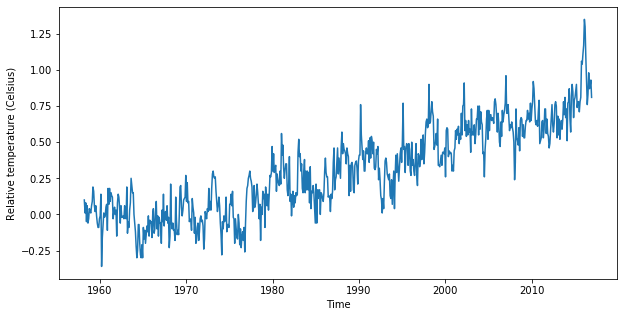

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change["relative_temp"])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

### 03-Using a time index to zoom in

* Use `plt.subplots` to create a Figure with one Axes called `fig` and `ax`, respectively.
* Create a variable called `seventies` that includes all the data between `"1970-01-01"` and `"1979-12-31"`.
* Add the data from `seventies` to the plot: use the DataFrame `index` for the x value and the `"co2"` column for the y values.

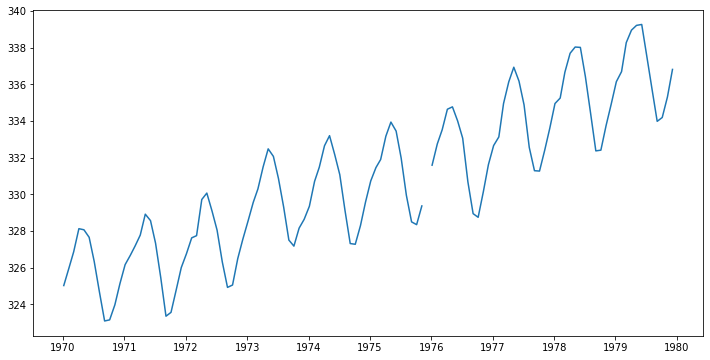

In [9]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots(figsize=(12,6))

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### 04- Plotting two variables

* Use `plt.subplots` to create a Figure and Axes objects called `fig` and `ax`, respectively.
* Plot the carbon dioxide variable in blue using the Axes `plot` method.
* Use the Axes `twinx` method to create a twin Axes that shares the x-axis.
* Plot the relative temperature variable in red on the twin Axes using its `plot` method.


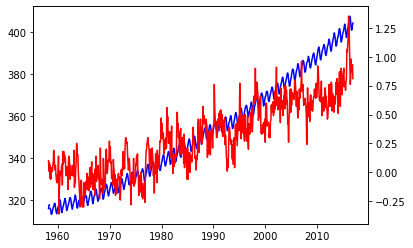

In [10]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color='r')

plt.show()

### 05-Defining a function that plots time-series data

* Define a function called `plot_timeseries` that takes as input an Axes object (`axes`), data (`x`,`y`), a string with the name of a color and strings for x- and y-axis labels.
* Plot y as a function of in the color provided as the input `color`.
* Set the x- and y-axis labels using the provided input `xlabel` and `ylabel`, setting the y-axis label color using `color`.
* Set the y-axis tick parameters using the `tick_params` method of the Axes object, setting the `colors` key-word to `color`.

In [11]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

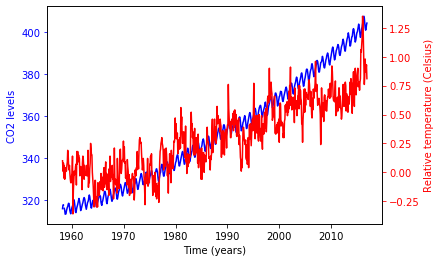

In [12]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()

### 06-Annotating a plot of time-series data
* Use the `ax.plot` method to plot the DataFrame index against the `relative_temp` column.
* Use the `annotate` method to add the text `'>1 degree'` in the location `(pd.Timestamp('2015-10-06'), 1)`.

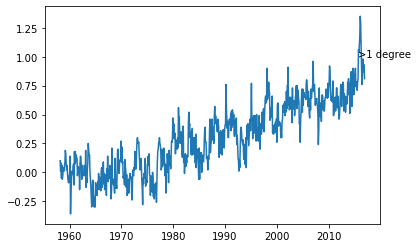

In [13]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change["relative_temp"])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

### 07-Plotting time-series: putting it all together

* Use the `plot_timeseries` function to plot CO2 levels against time. Set xlabel to `"Time (years)"` ylabel to `"CO2 levels"` and color to `'blue'`.
* Create `ax2`, as a twin of the first Axes.
* In `ax2`, plot temperature against time, setting the color ylabel to `"Relative temp (Celsius)"` and color to `'red'`.
* Annotate the data using the `ax2.annotate` method. Place the text ">1 degree" in `x=pd.Timestamp('2008-10-06')`, y=-`0.2 `pointing with a gray thin arrow to `x=pd.Timestamp('2015-10-06')`, y = `1`.


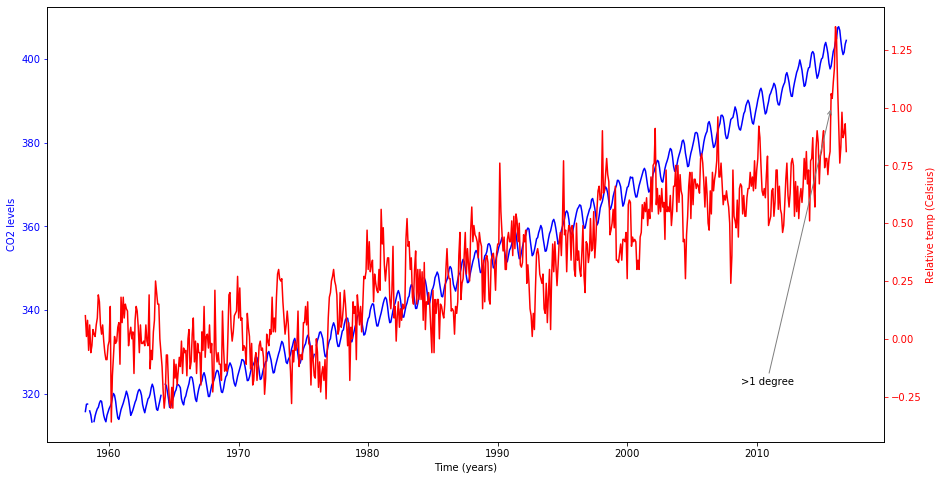

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1),
             xytext=(pd.Timestamp('2008-10-06'), -0.2), 
             arrowprops={'arrowstyle': '->', 'color': 'gray'})

plt.show()

==================================
### `The End`  
==================================

#